In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Start End IDs analysis

In [216]:
df1 = pd.read_csv('../debugArray_x.csv', header=None)
df2 = pd.read_csv('../debugArray_y.csv', header=None)
df3 = pd.read_csv('../debugArray_z.csv', header=None)
df4 = pd.read_csv('../debugArray_w.csv', header=None)
startend_df = pd.concat([df1, df2, df3, df4], axis=1)
startend_df.columns = ["cellID", "is_full", "start", "end"]

df1 = pd.read_csv('../debugArray_x_2.csv', header=None)
df2 = pd.read_csv('../debugArray_y_2.csv', header=None)
df3 = pd.read_csv('../debugArray_z_2.csv', header=None)
df4 = pd.read_csv('../debugArray_w_2.csv', header=None)
position_df = pd.concat([df1, df2, df3, df4], axis=1)
position_df.columns = ["pID", "X", "Y", "Z"]
# position_df.set_index(keys=["pID"], inplace=True)

df1 = pd.read_csv('../debugArray_x_3.csv', header=None)
df2 = pd.read_csv('../debugArray_y_3.csv', header=None)
df3 = pd.read_csv('../debugArray_z_3.csv', header=None)
df4 = pd.read_csv('../debugArray_w_3.csv', header=None)
cell_df = pd.concat([df1, df2, df3, df4], axis=1)
cell_df.columns = ["pID", "cellID", "is_full", "-1"]

In [217]:
start = cell_df.cellID[0]
end = cell_df.is_full[0]
cell_df

,pID,cellID,is_full,-1
0,0,39349,39359,-1
1,0,39349,39359,-1
2,0,39349,39359,-1
3,0,39349,39359,-1
4,0,39349,39359,-1
...,...,...,...,...
65531,0,39204,39208,-1
65532,0,39204,39208,-1
65533,0,39204,39208,-1
65534,0,39204,39208,-1


In [218]:
startend_df["step"] = startend_df.start - startend_df.end.shift(1)
startend_df["diff"] = startend_df.end - startend_df.start
startend_df
startend_df[startend_df.step != 1].head(10)


,cellID,is_full,start,end,step,diff
0,0,1,0,7,NaN,7
2833,2833,1,23239,23239,-30.0,0
2834,2834,1,23270,23276,31.0,6
8000,8000,0,0,0,-65535.0,0
8001,8001,0,0,0,0.0,0
8002,8002,0,0,0,0.0,0
8003,8003,0,0,0,0.0,0
8004,8004,0,0,0,0.0,0
8005,8005,0,0,0,0.0,0
8006,8006,0,0,0,0.0,0


In [219]:
startend_df.iloc[3290:3300, :]


,cellID,is_full,start,end,step,diff
3290,3290,1,26931,26935,1.0,4
3291,3291,1,26936,26950,1.0,14
3292,3292,1,26951,26959,1.0,8
3293,3293,1,26960,26975,1.0,15
3294,3294,1,26976,26987,1.0,11
3295,3295,1,26988,26988,1.0,0
3296,3296,1,26989,26999,1.0,10
3297,3297,1,27000,27006,1.0,6
3298,3298,1,27007,27013,1.0,6
3299,3299,1,27014,27019,1.0,5


In [220]:

r = 5.0
def get_cell_id(x, y, z):
    x = int(x / r)
    y = int(y / r)
    z = int(z / r)
    
    return x + 20*y + 20*20*z

position_df["calc_cell_id"] = position_df.apply(lambda row: get_cell_id(row.X, row.Y, row.Z), axis=1)
position_df.iloc[26943:26954, :]

,pID,X,Y,Z,calc_cell_id
26943,8735,59.98546,24.47027,42.65302,3291
26944,57658,59.15295,20.48679,44.44765,3291
26945,63736,58.49225,20.86723,41.58126,3291
26946,52649,57.14168,23.40551,40.89888,3291
26947,34062,56.59372,24.65979,42.77649,3291
26948,47893,58.30559,21.58837,43.19189,3291
26949,42299,58.50266,21.14312,42.41340,3291
26950,41085,59.10797,21.09789,43.45063,3291
26951,42937,60.43050,21.73911,43.67112,3292
26952,18095,61.84769,24.37014,40.67493,3292


In [205]:
get_cell_id(74.04684, 25.01717,	58.81264)

4514

In [211]:
cell_df.iloc[27035:27051, :]

,pID,cellID,is_full,-1
27035,0,50821,50831,-1
27036,0,50821,50831,-1
27037,0,50821,50831,-1
27038,0,50821,50831,-1
27039,0,50821,50831,-1
27040,0,50821,50831,-1
27041,0,50821,50831,-1
27042,0,50821,50831,-1
27043,0,50821,50831,-1
27044,0,50821,50831,-1


In [98]:
position_df

,pID,X,Y,Z
0,536,2.856994,2.475779,99.997310
1,4494,1.866848,1.997715,0.475354
2,24750,3.740995,0.675634,2.681091
3,47346,0.018963,2.586029,1.910275
4,34023,4.472533,3.734969,4.744913
...,...,...,...,...
65531,10782,95.584370,95.489170,98.189930
65532,14837,97.404700,95.343350,99.922020
65533,13296,95.711820,97.519910,96.457770
65534,14016,96.131430,98.563390,98.509530


In [74]:
cell_df[cell_df.X != 0]
cell_df

,cellID,X,Y,Z
0,0,1,-1,-1
1,1,1,-1,-1
2,2,1,-1,-1
3,3,1,-1,-1
4,4,1,-1,-1
...,...,...,...,...
65531,65531,0,-1,-1
65532,65532,0,-1,-1
65533,65533,0,-1,-1
65534,65534,0,-1,-1


### Positional, rodriguez rotation analysis

In [80]:
df1 = pd.read_csv('../debugArray_x.csv', header=None)
df2 = pd.read_csv('../debugArray_y.csv', header=None)
df3 = pd.read_csv('../debugArray_z.csv', header=None)
df4 = pd.read_csv('../debugArray_w.csv', header=None)
debug_data_1 = pd.concat([df1, df2, df3, df4], axis=1)
debug_data_1.columns = ["X", "Y", "Z", "W"]
debug_data_1["magnitude"] = debug_data_1.apply(lambda x: np.linalg.norm(np.array(x)), axis=1)

df1 = pd.read_csv('../debugArray_x_2.csv', header=None)
df2 = pd.read_csv('../debugArray_y_2.csv', header=None)
df3 = pd.read_csv('../debugArray_z_2.csv', header=None)
df4 = pd.read_csv('../debugArray_w_2.csv', header=None)
debug_data_2 = pd.concat([df1, df2, df3, df4], axis=1)
debug_data_2.columns = ["X", "Y", "Z", "W"]
debug_data_2["magnitude"] = debug_data_2.apply(lambda x: np.linalg.norm(np.array(x)), axis=1)

df1 = pd.read_csv('../debugArray_x_3.csv', header=None)
df2 = pd.read_csv('../debugArray_y_3.csv', header=None)
df3 = pd.read_csv('../debugArray_z_3.csv', header=None)
df4 = pd.read_csv('../debugArray_w_3.csv', header=None)
debug_data_3 = pd.concat([df1, df2, df3, df4], axis=1)
debug_data_3.columns = ["X", "Y", "Z", "W"]
debug_data_3["magnitude"] = debug_data_3.apply(lambda x: np.linalg.norm(np.array(x)), axis=1)

In [81]:
def pd_cross(df1, df2):
    # Extract x, y, z components from both dataframes
    vector1 = df1.iloc[:, :3].values
    vector2 = df2.iloc[:, :3].values
    
    # Compute cross product of the entire matrices
    cross_product_matrix = np.cross(vector1, vector2)
    
    # Create a new dataframe from the cross product matrix
    result_df = pd.DataFrame(cross_product_matrix, columns=['X', 'Y', 'Z'])
    
    return result_df

def rodd_rotate(v, axis, angle):
    # Initialize an empty array to store the dot product results
    dotted = np.zeros((len(v),1), dtype=np.float64)
    # Perform the dot product row by row
    for i in range(len(v)):
        dotted[i] = np.dot(axis.iloc[i, :], v.iloc[i, :])
    A = dotted.reshape(len(v))
    B = (1-np.cos(angle)).values.reshape(len(v))
    return v.multiply(np.cos(angle), axis=0) + pd_cross(axis, v).multiply(np.sin(angle), axis=0) + axis.multiply(A*B, axis=0)

def rodd_rotate_np(v, axis, angle):
    # Initialize an empty array to store the dot product results
    dotted = np.dot(axis, v.transpose())
    A = dotted.reshape(len(v))
    B = (1-np.cos(angle)).reshape(len(v))
    return v.multiply(np.cos(angle), axis=0) + pd_cross(axis, v).multiply(np.sin(angle), axis=0) + axis.multiply(A*B, axis=0)

In [82]:
debug_data_2

,X,Y,Z,W,magnitude
0,0.00545,0.231651,1.233562,1.275295,1.789342
1,27.73174,1.013363,1.965204,1.275295,27.848962
2,51.95175,4.511674,3.247084,1.275295,52.263845
3,61.06216,0.082714,3.352678,1.275295,61.167484
4,67.56007,4.875652,3.031951,1.275295,67.815589
...,...,...,...,...,...
2043,38.58945,99.808310,98.231220,1.275295,145.264735
2044,87.01771,96.625490,98.895130,1.275295,163.372092
2045,88.55912,97.899840,97.130000,1.275295,163.899236
2046,98.87838,98.086250,99.544050,1.275295,171.197228


In [83]:
v = debug_data_1.iloc[:, :3]
axis = debug_data_3.iloc[:, :3]
angle = debug_data_3.iloc[:, 3]
rodd_rotate(v, axis, angle)

,X,Y,Z
0,-0.296092,-0.738101,0.606248
1,0.613911,0.517557,0.596027
2,0.542433,-0.329049,0.772976
3,0.845524,-0.200564,0.494836
4,0.987717,-0.043283,-0.150139
...,...,...,...
2043,0.230078,0.930955,-0.283525
2044,0.185934,-0.729392,0.658344
2045,-0.640951,-0.288620,-0.711253
2046,0.667290,0.621147,-0.410974


In [84]:
debug_data_3.iloc[:, 3].max()

3.137465

In [85]:
import plotly.express as px

fig = px.scatter_3d(debug_data_1.iloc[start:end], x='X', y='Y', z='Z', color='Z')
fig.show()

In [86]:

fig = px.scatter_3d(debug_data_2.iloc[start:end], x='X', y='Y', z='Z', color='Z')
fig.show()

In [87]:

fig = px.scatter_3d(debug_data_3.iloc[start:end], x='X', y='Y', z='Z', color='Z')
fig.show()

In [88]:
init_v = (np.random.rand(10000, 3) - 0.5) * 2
random_vecs = (np.random.rand(10000, 3) - 0.5) *2
# normal_vecs = np.array([vec for vec in np.cross(init_v, random_vecs)])
normal_vecs = np.array([vec / np.linalg.norm(vec)for vec in np.cross(init_v, random_vecs)])
angles = np.random.rand(10000) * np.pi

In [89]:

df = pd.DataFrame(normal_vecs, columns=["X", "Y", "Z"])
# df
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z')
fig.show()

In [90]:
init_vectors = debug_data_1.loc[:, ["X", "Y", "Z"]]
new_vectors = debug_data_2.loc[:, ["X", "Y", "Z"]]

In [91]:
A = debug_data_1.iloc[0, [0,1,2]].values
B = debug_data_2.iloc[0, [0,1,2]].values
A_mag = debug_data_1.iloc[0, 4]
B_mag = debug_data_2.iloc[0, 4]

np.dot(A, B) / (A_mag*B_mag)
# debug_data_1


0.37662263683475705

### General Noise Analysis

In [226]:
df1 = pd.read_csv('../debugArray_x.csv', header=None)
df2 = pd.read_csv('../debugArray_y.csv', header=None)
df3 = pd.read_csv('../debugArray_z.csv', header=None)
df4 = pd.read_csv('../debugArray_w.csv', header=None)
position_df = pd.concat([df1, df2, df3, df4], axis=1)
position_df.columns = ["pID", "X", "Y", "Z"]

df1 = pd.read_csv('../debugArray_x_2.csv', header=None)
df2 = pd.read_csv('../debugArray_y_2.csv', header=None)
df3 = pd.read_csv('../debugArray_z_2.csv', header=None)
df4 = pd.read_csv('../debugArray_w_2.csv', header=None)
random_df = pd.concat([df1, df2, df3, df4], axis=1)
random_df.columns = ["pID", "randX", "randY", "randZ"]

In [227]:
random_df

,pID,randX,randY,randZ
0,530,-0.323291,-0.841721,-0.432422
1,1584,0.307700,0.776709,-0.549585
2,6339,0.793310,0.606895,0.048355
3,30924,0.983677,-0.108254,0.143741
4,20465,0.748175,0.313510,-0.584761
...,...,...,...,...
65531,34172,-0.559776,-0.806974,0.188268
65532,48958,-0.746192,0.536475,0.394197
65533,17273,-0.735732,0.095267,-0.670539
65534,21095,0.849960,-0.070431,-0.522118


In [228]:
import plotly.express as px
start, end = 0, 1000
fig = px.scatter_3d(random_df.iloc[start:end], x='randX', y='randY', z='randZ', color='randZ')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['pID', 'randX', 'randY', 'randZ'] but received: X

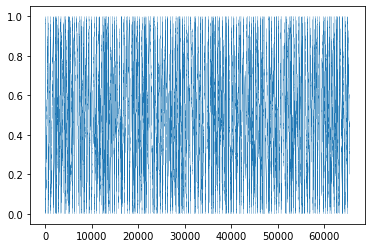

In [ ]:
plt.plot(df1.index, df1.values, linewidth=0.2)

(array([6596., 6589., 6590., 6598., 6592., 6591., 6600., 6571., 6404.,
        6405.]),
 array([1.24659000e-05, 1.00009009e-01, 2.00005553e-01, 3.00002096e-01,
        3.99998640e-01, 4.99995183e-01, 5.99991726e-01, 6.99988270e-01,
        7.99984813e-01, 8.99981357e-01, 9.99977900e-01]),
 <BarContainer object of 10 artists>)

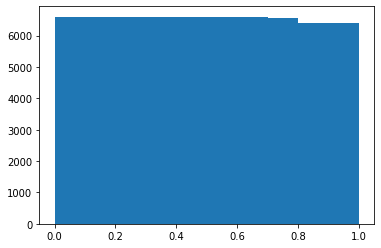

In [ ]:
plt.hist(df1)

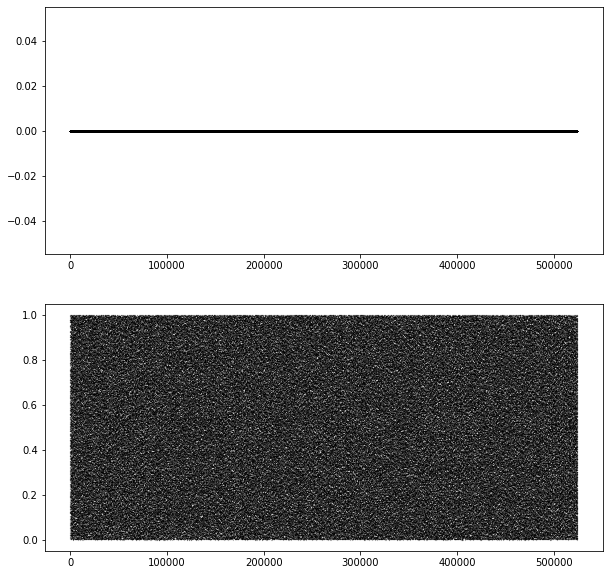

In [ ]:
fig,ax = plt.subplots(2, figsize=(10,10))
ax[0].scatter(x=list(df1.index), y=df1.loc[:, 0], s=0.01, c='k')
ax[1].scatter(x=list(df2.index), y=df2.loc[:, 0], s=0.01, c='k')

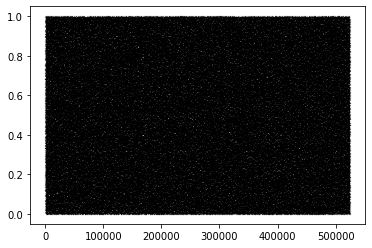

In [ ]:
plt.scatter(x=list(df2.index), y=df2.loc[:, 0], s=0.01, c='k')

In [ ]:
import numpy as np
noise = 0.7
th1 = np.arccos(1 - 2*np.random.random(1000)) * noise
th2 = np.arccos(1 - 2*np.random.random(1000) * noise) 

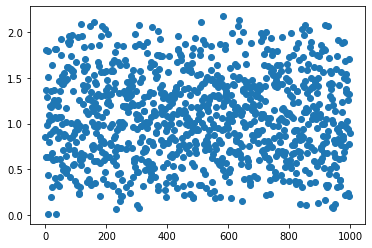

In [ ]:
plt.scatter(x=np.linspace(0, len(th1)-1, len(th1)), y=th1)


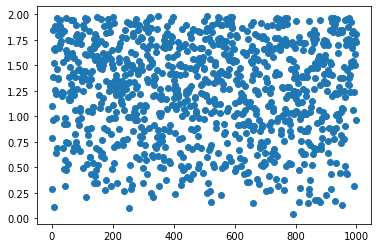

In [ ]:
plt.scatter(x=np.linspace(0, len(th2)-1, len(th2)), y=th2)